<a href="https://colab.research.google.com/github/inessellami/QM2-Project-/blob/Code/Merge%2C%20Mult.Reg%20and%20Choropleth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
from google.colab import files
income = files.upload()

Saving median.csv to median.csv


In [ ]:
from google.colab import files
education = files.upload()

Saving sample_data_Education.csv to sample_data_Education.csv


In [ ]:
from google.colab import files
abortion = files.upload()

Saving abortion rate data.csv to abortion rate data.csv


In [ ]:
from google.colab import files
religion = files.upload()

Saving sample_data_Religiosity.csv to sample_data_Religiosity.csv


In [ ]:
from google.colab import files
politic = files.upload()

Saving sample_data_Political Affiliation.csv to sample_data_Political Affiliation.csv


In [ ]:
from google.colab import files
party = files.upload()

In [ ]:
# 1. Data merge

income = pd.read_csv('median.csv')
education = pd.read_csv('sample_data_Education.csv')
abortion = pd.read_csv('abortion rate data.csv')
religion = pd.read_csv('sample_data_Religiosity.csv')
politic = pd.read_csv('sample_data_Political Affiliation.csv')


In [ ]:
# Give Index to each state for merging purpose

religion['State'] = religion['State'].astype(str)
income['State'] = income['State'].astype(str)
education['State'] = education['State'].astype(str)
abortion['States'] = abortion['States'].astype(str)
politic['State'] = politic['State'].astype(str)



religion.set_index('State')
income.set_index('State')
education.set_index('State')
abortion.set_index('States')
politic.set_index('State')


income.index.name = "code"
education.index.name = "code"
abortion.index.name = "code"
politic.index.name = "code"
religion.index.name = "code"





In [ ]:
# Merge 6 datasets

merged = income.merge(abortion, left_on = 'code', right_on = 'code') 
merged1 = merged.merge(education, left_on = 'code', right_on = 'code')
merged2 = merged1.merge(religion, left_on = 'code', right_on = 'code')
df = merged2.merge(politic, left_on = 'code', right_on = 'code')

df.drop(columns=['State_y'], inplace= True)
df.drop(columns=['State_x'], inplace= True)


df.rename(columns={'High':'religion'}, inplace=True) 
df.rename(columns={'2014-2018':'education'}, inplace=True)
abortion.rename(columns={'Abortion rate ':'abortion'}, inplace=True)
df.rename(columns={'Median income in 2014':'income'}, inplace=True)
df.rename(columns={'Republican/lean Rep. (percentage)':'Rep'}, inplace=True)
df.rename(columns={'Democrat/ lean. Dem. (percentage)':'Dem'}, inplace=True)
df.rename(columns={'Abortion rate':'abortion'}, inplace=True) 
df.rename(columns={'States_x':'state'}, inplace=True) 


# Remove the "," in income values and convert to numeric type
df['income'] = df['income'].str.replace(',', '')
df['income'] = pd.to_numeric(df['income'])

df


,income,States,abortion,education,religion,Rep,Dem
code,,,,,,,
0,42278,Alabama,8.3,14.2,77,52,35
1,67629,Alaska,9.9,7.3,45,39,32
2,49254,Arizona,10.5,13.2,53,40,39
3,44922,Arkansas,6.2,13.8,70,46,38
4,60487,California,17.3,17.1,49,30,49
5,60940,Colorado,9.8,8.6,47,41,42
6,70161,Connecticut,18.2,9.5,43,32,50
7,57522,Delaware,16.1,10.2,52,29,55
8,68277,District of Columbia,15.5,9.4,53,11,73


In [ ]:
df.to_csv(r'sample_data\Final merged dataset.csv', index = False)


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 1. Building multi regresison model

#df_dummy = pd.get_dummies(df['Party'])
#df_dummy = pd.concat([df,df_dummy],axis = 1)
#df_dummy


model = sm.OLS.from_formula('abortion ~ income + education + religion + Rep', df).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               abortion   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     13.37
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           2.64e-07
Time:                        21:06:19   Log-Likelihood:                -136.42
No. Observations:                  51   AIC:                             282.8
Df Residuals:                      46   BIC:                             292.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7994      9.333      0.943      0.351      -9.986      27.585
income         0.0002   8.95e-05      1.807      0.077   -1.84e-05       0.000
education      0.6648      0.314      2.120      0.039       0.034       1.296
religion      -0.0075      0.081     -0.093      0.926      -0.170       0.155
Rep           -0.3355      0.091     -3.705      0.001      -0.518      -0.153
==============================================================================
Omnibus:                       19.370   Durbin-Watson:                   2.462
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.741
Skew:                           1.284   Prob(JB):                     9.47e-07
Kurtosis:                       5.541   Cond. No.                     1.01e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Choropleth maps 

In [ ]:
!pip install pysal
!pip install geopandas
!pip install descartes
!pip install mapclassify

from pysal import *
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pylab
import descartes
import mapclassify


     |████████████████████████████████| 112kB 5.8MB/s 
     |████████████████████████████████| 2.4MB 17.9MB/s 
     |████████████████████████████████| 92kB 11.4MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 92kB 11.7MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 266kB 43.1MB/s 
     |████████████████████████████████| 5.7MB 15.5MB/s 
     |████████████████████████████████| 235kB 54.0MB/s 
     |████████████████████████████████| 235kB 62.7MB/s 
     |████████████████████████████████| 56.4MB 74kB/s 
     |████████████████████████████████| 972kB 60.0MB/s 
     |████████████████████████████████| 1.0MB 46.7MB/s 
     |████████████████████████████████| 18.3MB 230kB/s 
     |████████████████████████████████| 6.5MB 41.9MB/s 
     |████████████████████████████████| 14.8MB 151kB/s 
    

In [ ]:
from google.colab import files
shp = files.upload()
pri = files.upload()
shx = files.upload()
dbf = files.upload()
cpg = files.upload()

Saving States_shapefile.shp to States_shapefile.shp


Saving States_shapefile.prj to States_shapefile.prj


Saving States_shapefile.shx to States_shapefile.shx


Saving States_shapefile.dbf to States_shapefile.dbf


Saving States_shapefile.cpg to States_shapefile.cpg


In [ ]:
states = gp.read_file('States_shapefile.shp')

In [ ]:
df['States'] = df['States'].str.upper()

merged = states.merge(df, left_on = 'State_Name', right_on = 'States')

merged.head()

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry,income,States,abortion,education,religion,Rep,Dem
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",42278,ALABAMA,8.3,14.2,77,52,35
1,2,None,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824...",67629,ALASKA,9.9,7.3,45,39,32
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0...",49254,ARIZONA,10.5,13.2,53,40,39
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508...",44922,ARKANSAS,6.2,13.8,70,46,38
4,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823...",60487,CALIFORNIA,17.3,17.1,49,30,49


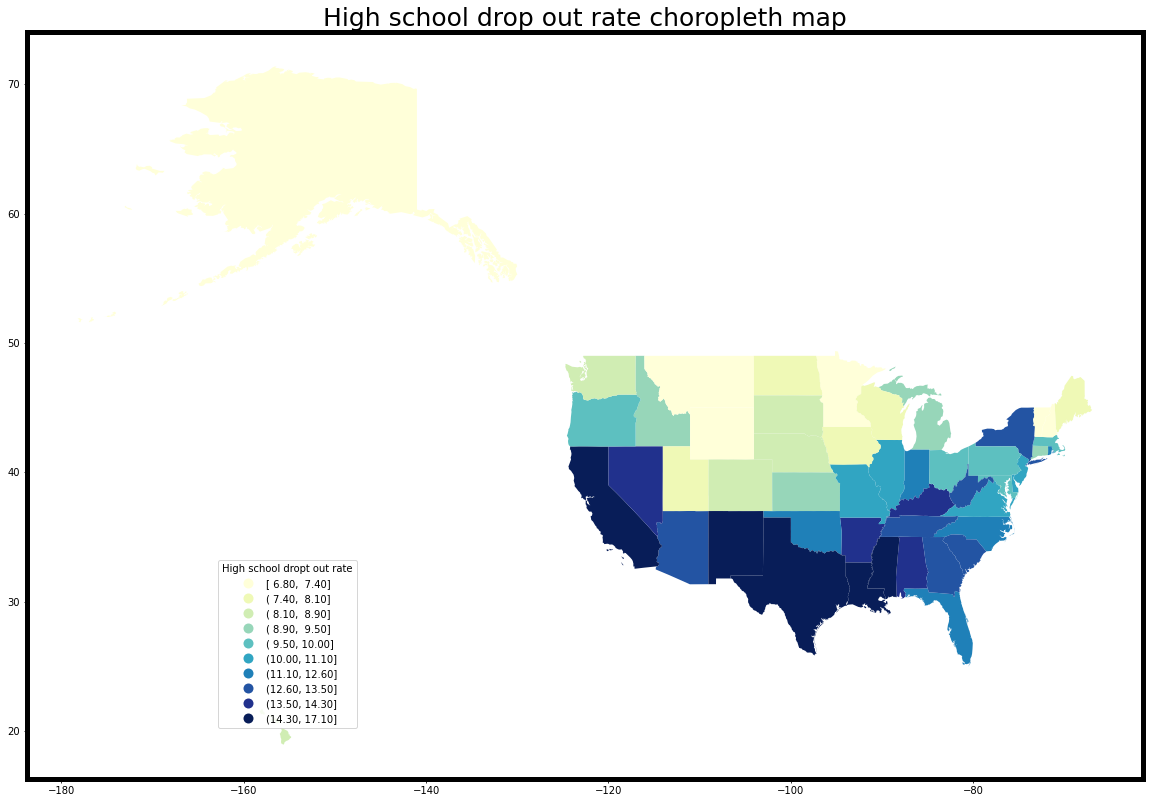

In [ ]:
ax = merged.plot(column='education', cmap =    
                                'YlGnBu', figsize=(20,14),   
                                 scheme='quantiles', k=10, legend =  
                                  True)
ax.set_title('High school drop out rate choropleth map', fontdict= 
            {'fontsize':25})


 
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('5')  
ax.get_legend().set_bbox_to_anchor((.3,.3) )
ax.get_legend().set_title("High school dropt out rate")




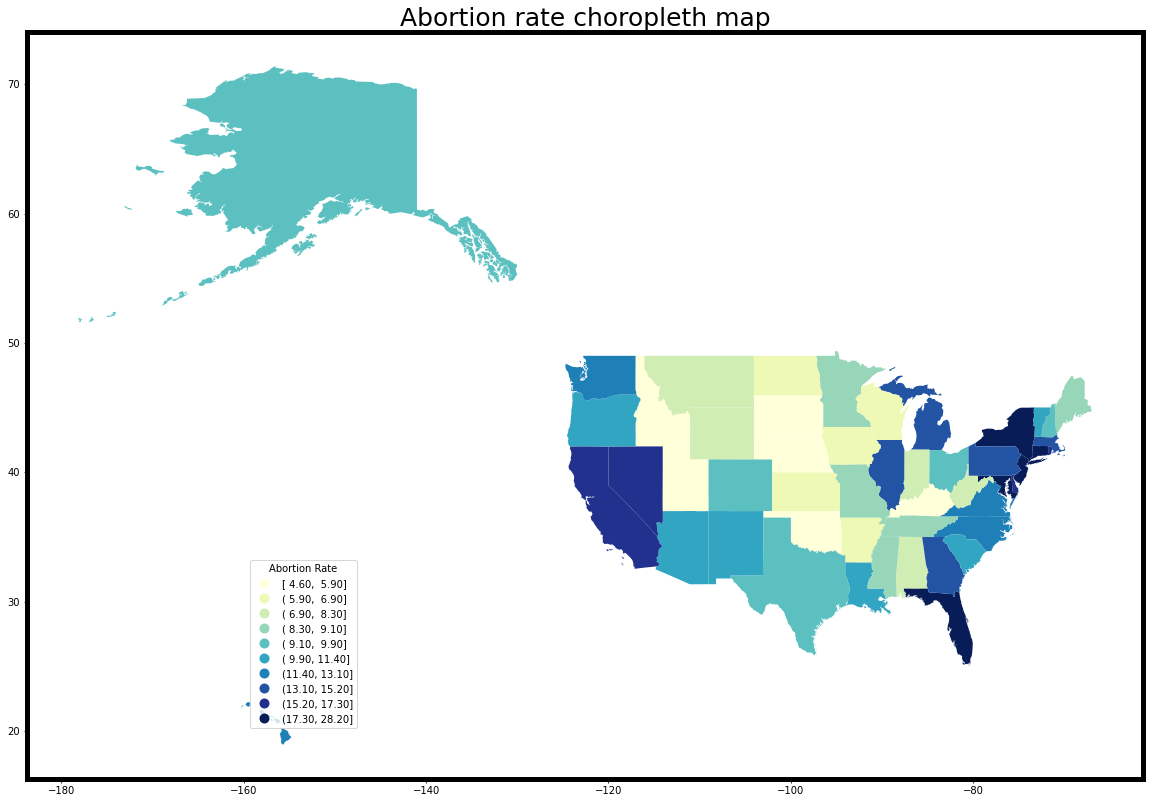

In [ ]:
ax = merged.plot(column='abortion', cmap =    
                                'YlGnBu', figsize=(20,14),   
                                 scheme='quantiles', k=10, legend =  
                                  True)
ax.set_title('Abortion rate choropleth map', fontdict= 
            {'fontsize':25})


 
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('5')  
ax.get_legend().set_bbox_to_anchor((.3,.3) )
ax.get_legend().set_title("Abortion Rate")

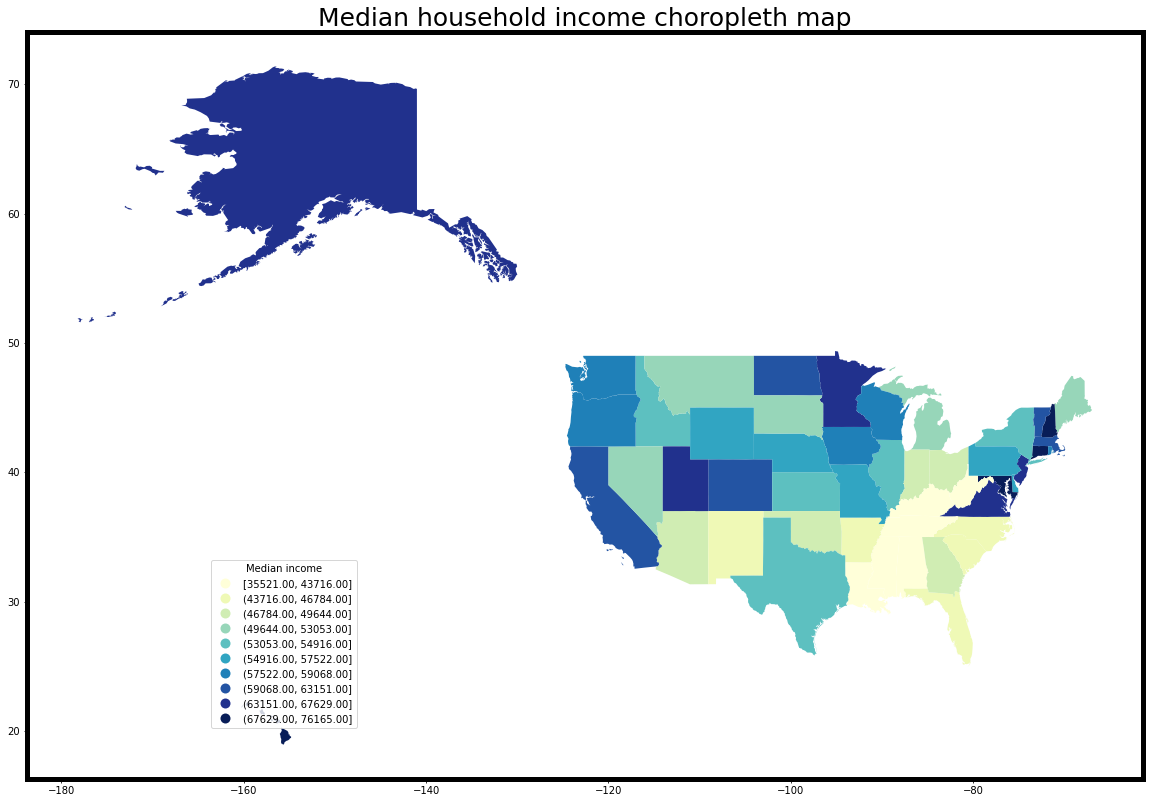

In [ ]:
ax = merged.plot(column='income', cmap =    
                                'YlGnBu', figsize=(20,14),   
                                 scheme='quantiles', k=10, legend =  
                                  True)
ax.set_title('Median household income choropleth map', fontdict= 
            {'fontsize':25})


 
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('5')  
ax.get_legend().set_bbox_to_anchor((.3,.3) )
ax.get_legend().set_title("Median income")



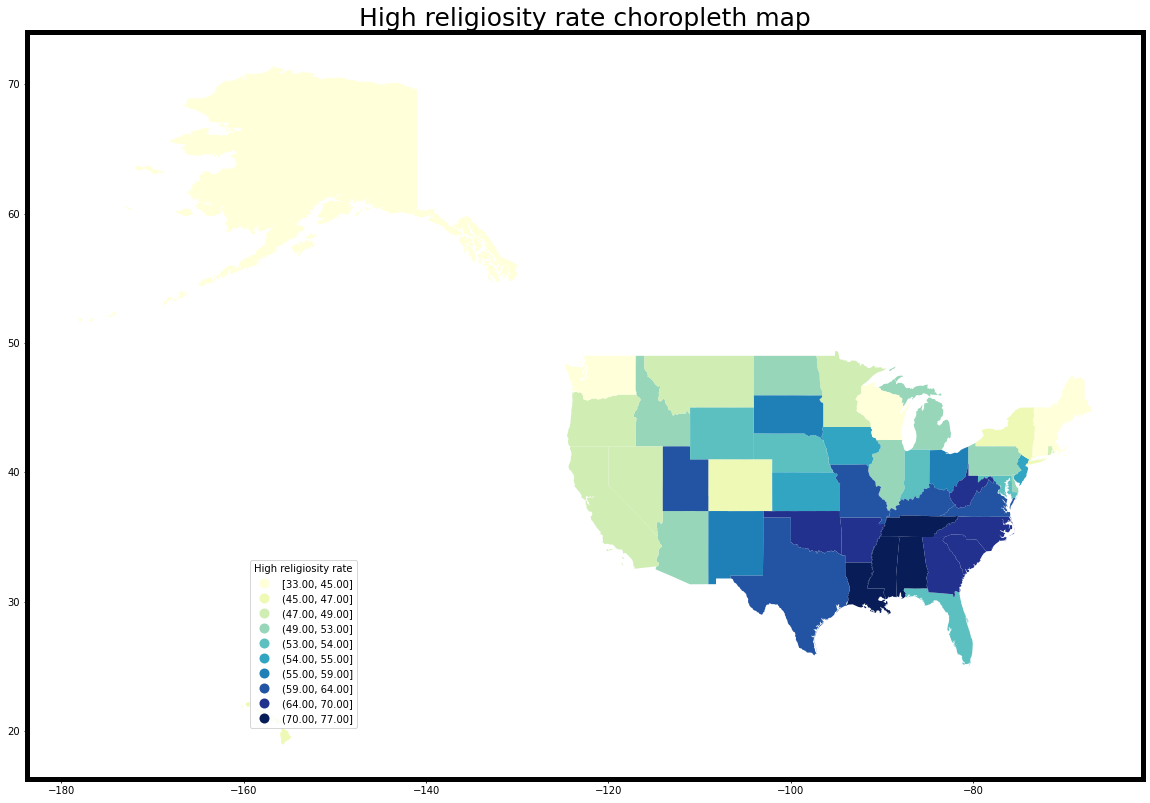

In [ ]:
ax = merged.plot(column='religion', cmap =    
                                'YlGnBu', figsize=(20,14),   
                                 scheme='quantiles', k=10, legend =  
                                  True)
ax.set_title('High religiosity rate choropleth map', fontdict= 
            {'fontsize':25})


 
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('5')  
ax.get_legend().set_bbox_to_anchor((.3,.3) )
ax.get_legend().set_title("High religiosity rate")



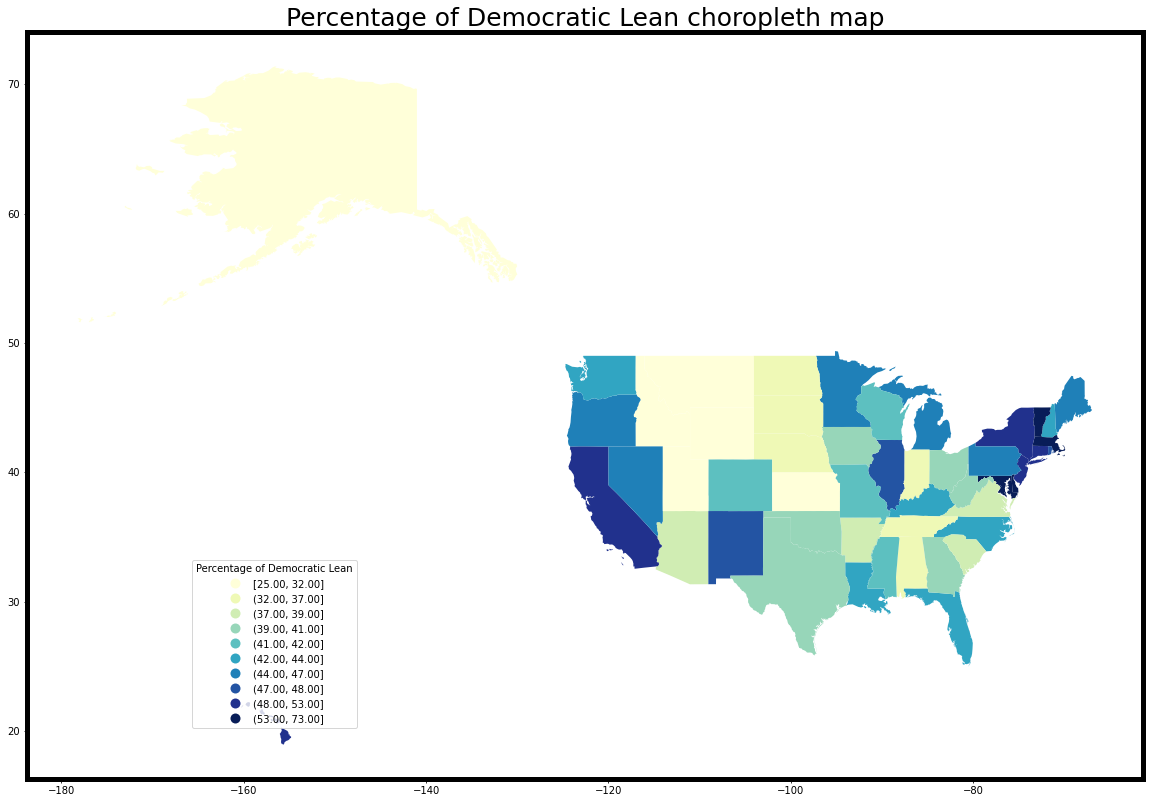

In [ ]:
ax = merged.plot(column='Dem', cmap =    
                                'YlGnBu', figsize=(20,14),   
                                 scheme='quantiles', k=10, legend =  
                                  True)
ax.set_title('Percentage of Democratic Lean choropleth map', fontdict= 
            {'fontsize':25})


 
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('5')  
ax.get_legend().set_bbox_to_anchor((.3,.3) )
ax.get_legend().set_title("Percentage of Democratic Lean")



/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:235: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 9
  Warn("Warning: setting k to %d" % k_q, UserWarning)


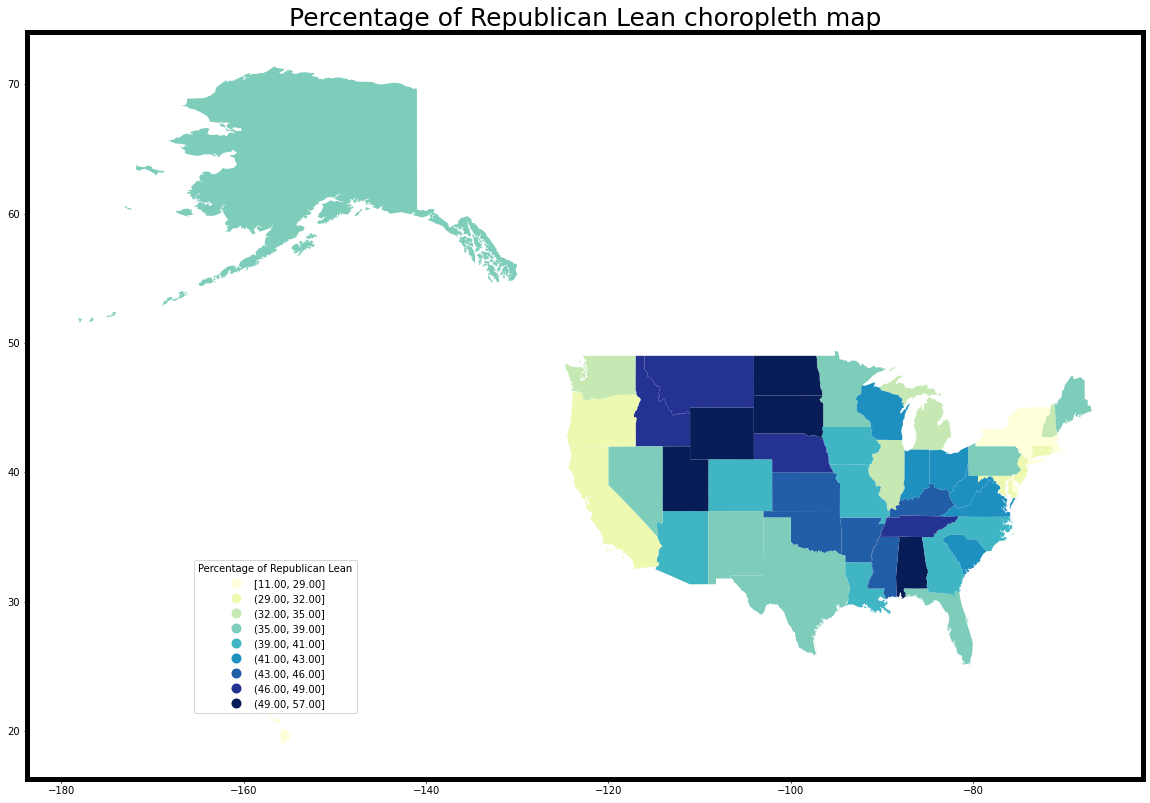

In [ ]:
ax = merged.plot(column='Rep', cmap =    
                                'YlGnBu', figsize=(20,14),   
                                 scheme='quantiles', k=10, legend =  
                                  True)
ax.set_title('Percentage of Republican Lean choropleth map', fontdict= 
            {'fontsize':25})


 
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('5')  
ax.get_legend().set_bbox_to_anchor((.3,.3) )
ax.get_legend().set_title("Percentage of Republican Lean")

